Importing Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

Loading the dataset after feature selection

In [5]:
try:
    df = pd.read_csv('C:/MENNA_DATA/Heart_Disease_Project/dataset attributes/feature_selected_dataset.csv')
    print("Feature-selected dataset loaded.")
except FileNotFoundError:
    print("Error: 'feature_selected_dataset.csv' not found.")
    exit()
X = df.drop('target', axis=1)
y = df['target']

Feature-selected dataset loaded.


K-Means Clustering

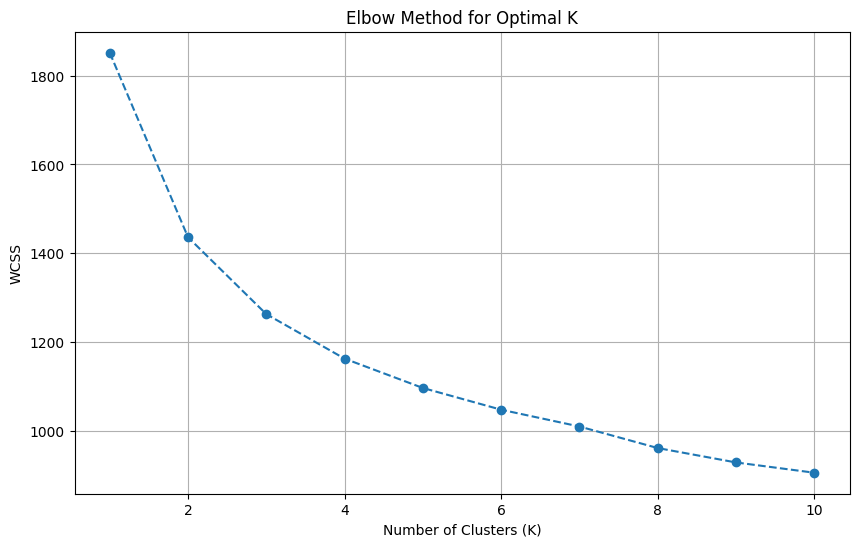

In [25]:
# K-Means with Elbow method to find optimal K
wcss = [] 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

The average silhouette score is: 0.204


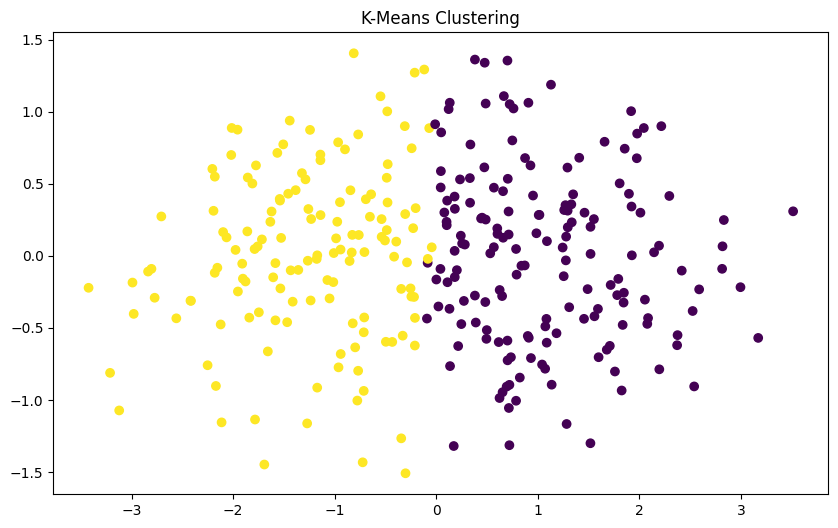

In [26]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"The average silhouette score is: {silhouette_avg:.3f}")
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

Hierarchical Clustering

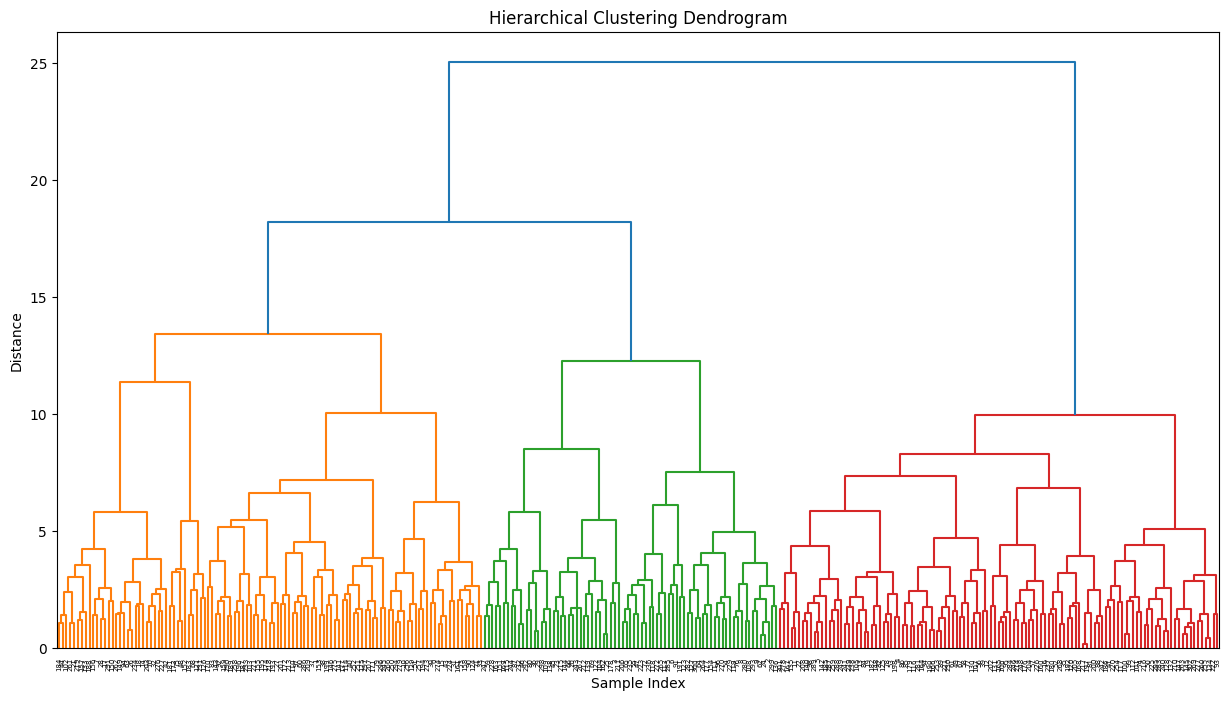

In [27]:
linked = linkage(X, method='ward')
plt.figure(figsize=(15, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

Comparing Clusters with Actual Labels

In [32]:
# Add cluster labels to the DataFrame
df['kmeans_cluster'] = y_kmeans
df['hc_cluster'] = y_hc
def pretty_crosstab(y_true, y_pred, method_name):
    # Count table
    count_table = pd.crosstab(y_true, y_pred)
    # Percentage table (row-wise)
    percent_table = count_table.div(count_table.sum(axis=1), axis=0) * 100
    percent_table = percent_table.round(1)
    print(f"\n=== {method_name} Crosstab ===")
    print("Counts:")
    print(count_table)
    print("\nRow percentages:")
    print(percent_table)
# K-Means results
pretty_crosstab(df['target'], df['kmeans_cluster'], "K-Means")
# Hierarchical results
pretty_crosstab(df['target'], df['hc_cluster'], "Hierarchical")



=== K-Means Crosstab ===
Counts:
kmeans_cluster    0   1
target                 
0               124  40
1                40  99

Row percentages:
kmeans_cluster     0     1
target                    
0               75.6  24.4
1               28.8  71.2

=== Hierarchical Crosstab ===
Counts:
hc_cluster    0   1
target             
0            74  90
1           114  25

Row percentages:
hc_cluster     0     1
target                
0           45.1  54.9
1           82.0  18.0
